#**Environment Agency's Natural Flood Management - Data Challenge**

## Mount Drive, import packages, and download files

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Import required packages

In [ ]:
!pip install geopandas

In [47]:
!pip install contextily

     |████████████████████████████████| 18.1MB 65.6MB/s 


In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from google_drive_downloader import GoogleDriveDownloader as gdd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
import seaborn as sns

Download and unzip the data into Google Drive folder

If you prefer to download it manually and/or to your local environment, data is also available at:
https://drive.google.com/file/d/16STKJaKt_ipZZ6-4d7II9TO4eaia9agb/view?usp=sharing

In [3]:
gdd.download_file_from_google_drive(file_id='16STKJaKt_ipZZ6-4d7II9TO4eaia9agb',
                                    dest_path='/content/drive/My Drive/EA_hackathon/EA_files.zip', 
                                    showsize=True,
                                    unzip=True)

107.9 MiB Done.
Unzipping...Done.


## Import data sets into dataframes and plot time series

#### Flow data at 60min resolution

Import data into Pandas dataframe

In [41]:
%%time
nfm_assets = pd.read_excel('/content/drive/My Drive/EA_hackathon/Shipston Assets 8.10 Cambridge snapshot (first 200 assets).xlsx',
                           header=1)

CPU times: user 78 ms, sys: 0 ns, total: 78 ms
Wall time: 81.9 ms


Explore data (5 top rows) 

In [37]:
nfm_assets.head()

,ObjectID,GlobalID,Select project,FR1_ProjectName,Asset ID:,Asset Type,Asset Description,Date Installed,Installed Cost (£),Watercourse Type,Stream Width (m),Land Drainage Consent Difficulty,Ecological Consent Difficulty,Average member length in Leaky Barrier (m),Wood Diameter (cm),Height of Leaky Barrier above bed (cm),Height of Leaky Barrier above bank (cm),Wood Species Used,Other Wood Species,Bund height (m),Bund width (m),Bund length (m),Bund Material,Gully Block Length (m),Gully Block Width (m),Gully Block Material,Soil Equipment or Technique Used,Flood Efficacy,FR3 Area Units,FR3_AreaRough,Storage Created (m3),FR3_AreaIncreasedLoss,Changed Flood Pathway?,Reduced Erosion?,Asset Condition,Date Assessed,Comments,CreationDate,Creator,EditDate,Editor,x,y
0,883,33059012-1c4d-43c7-adb7-496972f3c9b4,A017,Shipston,A017_2006151117,leaky_barriers,9,2020-06-02 11:00:00,1,ordinary,3.0,easy,n_a,5.0,20.0,30.0,0.0,willow_dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,135.0,NaN,no,NaN,good,2020-06-15 11:00:00,NaN,2020-06-15 10:18:01,gsmithadmin,2020-08-03 11:44:52,NaN,-1.715078,52.069716
1,1066,02b90a36-d984-4b36-a299-4fbbe884f7b2,A017,Shipston,A017_2008051630,leaky_barriers,BLOCKPOTT*1,2020-08-05 11:00:00,260,ordinary,1.5,easy,n_a,3.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,40.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:44:24,NaN,2020-09-18 19:01:54,gsmithadmin,-1.732871,52.026232
2,1067,6f0e9956-8d95-4ebf-a540-9f0cabc735e9,A017,Shipston,A017_2008051627,leaky_barriers,BLOCKPOTT*2,2020-08-05 11:00:00,260,ordinary,1.5,easy,n_a,3.5,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,30.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:44:36,NaN,2020-09-18 19:02:03,gsmithadmin,-1.732574,52.026312
3,1068,a5d7435c-363e-41bf-ac2e-cea617acbfcd,A017,Shipston,A017_2008051625,leaky_barriers,BLOCKPOTT*3,2020-08-05 11:00:00,260,ordinary,1.5,easy,n_a,3.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,25.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:44:49,NaN,2020-09-18 19:02:11,gsmithadmin,-1.732450,52.026399
4,1069,01f0b340-5a4d-483d-91d0-7161b87d3ccb,A017,Shipston,A017_2008051622,leaky_barriers,BLOCKPOTT*4,2020-08-05 11:00:00,260,ordinary,2.0,easy,n_a,4.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,30.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:45:02,NaN,2020-09-18 19:02:50,gsmithadmin,-1.732442,52.026492


In [42]:
nfm_assets = nfm_assets.rename(columns={"x":"Longitude", "y":"Latitude"})

In [50]:
geometry = [Point(xy) for xy in zip(nfm_assets['Longitude'], nfm_assets['Latitude'])]
geo_df = gpd.GeoDataFrame(nfm_assets, crs={'init':'epsg:4326'}, geometry=geometry)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [70]:
geo_df.head()

,ObjectID,GlobalID,Select project,FR1_ProjectName,Asset ID:,Asset Type,Asset Description,Date Installed,Installed Cost (£),Watercourse Type,Stream Width (m),Land Drainage Consent Difficulty,Ecological Consent Difficulty,Average member length in Leaky Barrier (m),Wood Diameter (cm),Height of Leaky Barrier above bed (cm),Height of Leaky Barrier above bank (cm),Wood Species Used,Other Wood Species,Bund height (m),Bund width (m),Bund length (m),Bund Material,Gully Block Length (m),Gully Block Width (m),Gully Block Material,Soil Equipment or Technique Used,Flood Efficacy,FR3 Area Units,FR3_AreaRough,Storage Created (m3),FR3_AreaIncreasedLoss,Changed Flood Pathway?,Reduced Erosion?,Asset Condition,Date Assessed,Comments,CreationDate,Creator,EditDate,Editor,Longitude,Latitude,geometry
0,883,33059012-1c4d-43c7-adb7-496972f3c9b4,A017,Shipston,A017_2006151117,leaky_barriers,9,2020-06-02 11:00:00,1,ordinary,3.0,easy,n_a,5.0,20.0,30.0,0.0,willow_dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,135.0,NaN,no,NaN,good,2020-06-15 11:00:00,NaN,2020-06-15 10:18:01,gsmithadmin,2020-08-03 11:44:52,NaN,-1.715078,52.069716,POINT (-190921.637 6812740.756)
1,1066,02b90a36-d984-4b36-a299-4fbbe884f7b2,A017,Shipston,A017_2008051630,leaky_barriers,BLOCKPOTT*1,2020-08-05 11:00:00,260,ordinary,1.5,easy,n_a,3.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,40.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:44:24,NaN,2020-09-18 19:01:54,gsmithadmin,-1.732871,52.026232,POINT (-192902.265 6804870.015)
2,1067,6f0e9956-8d95-4ebf-a540-9f0cabc735e9,A017,Shipston,A017_2008051627,leaky_barriers,BLOCKPOTT*2,2020-08-05 11:00:00,260,ordinary,1.5,easy,n_a,3.5,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,30.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:44:36,NaN,2020-09-18 19:02:03,gsmithadmin,-1.732574,52.026312,POINT (-192869.231 6804884.449)
3,1068,a5d7435c-363e-41bf-ac2e-cea617acbfcd,A017,Shipston,A017_2008051625,leaky_barriers,BLOCKPOTT*3,2020-08-05 11:00:00,260,ordinary,1.5,easy,n_a,3.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,25.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:44:49,NaN,2020-09-18 19:02:11,gsmithadmin,-1.732450,52.026399,POINT (-192855.502 6804900.056)
4,1069,01f0b340-5a4d-483d-91d0-7161b87d3ccb,A017,Shipston,A017_2008051622,leaky_barriers,BLOCKPOTT*4,2020-08-05 11:00:00,260,ordinary,2.0,easy,n_a,4.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,ha,NaN,30.0,NaN,no,NaN,good,2020-06-29 23:00:00,Slatted,2020-08-05 16:45:02,NaN,2020-09-18 19:02:50,gsmithadmin,-1.732442,52.026492,POINT (-192854.575 6804917.054)


In [69]:
for col in geo_df:
  print(f'Name: {col}, Missing Values: {geo_df[col].isna().sum()}')

Name: ObjectID, Missing Values: 0
Name: GlobalID, Missing Values: 0
Name: Select project, Missing Values: 0
Name: FR1_ProjectName, Missing Values: 0
Name: Asset ID:, Missing Values: 0
Name: Asset Type, Missing Values: 0
Name: Asset Description, Missing Values: 0
Name: Date Installed, Missing Values: 0
Name: Installed Cost (£), Missing Values: 0
Name: Watercourse Type, Missing Values: 5
Name: Stream Width (m), Missing Values: 42
Name: Land Drainage Consent Difficulty, Missing Values: 10
Name: Ecological Consent Difficulty, Missing Values: 13
Name: Average member length in Leaky Barrier (m), Missing Values: 41
Name: Wood Diameter (cm), Missing Values: 66
Name: Height of Leaky Barrier above bed (cm), Missing Values: 44
Name: Height of Leaky Barrier above bank (cm), Missing Values: 115
Name: Wood Species Used, Missing Values: 170
Name: Other Wood Species, Missing Values: 190
Name: Bund height (m), Missing Values: 194
Name: Bund width (m), Missing Values: 194
Name: Bund length (m), Missing 

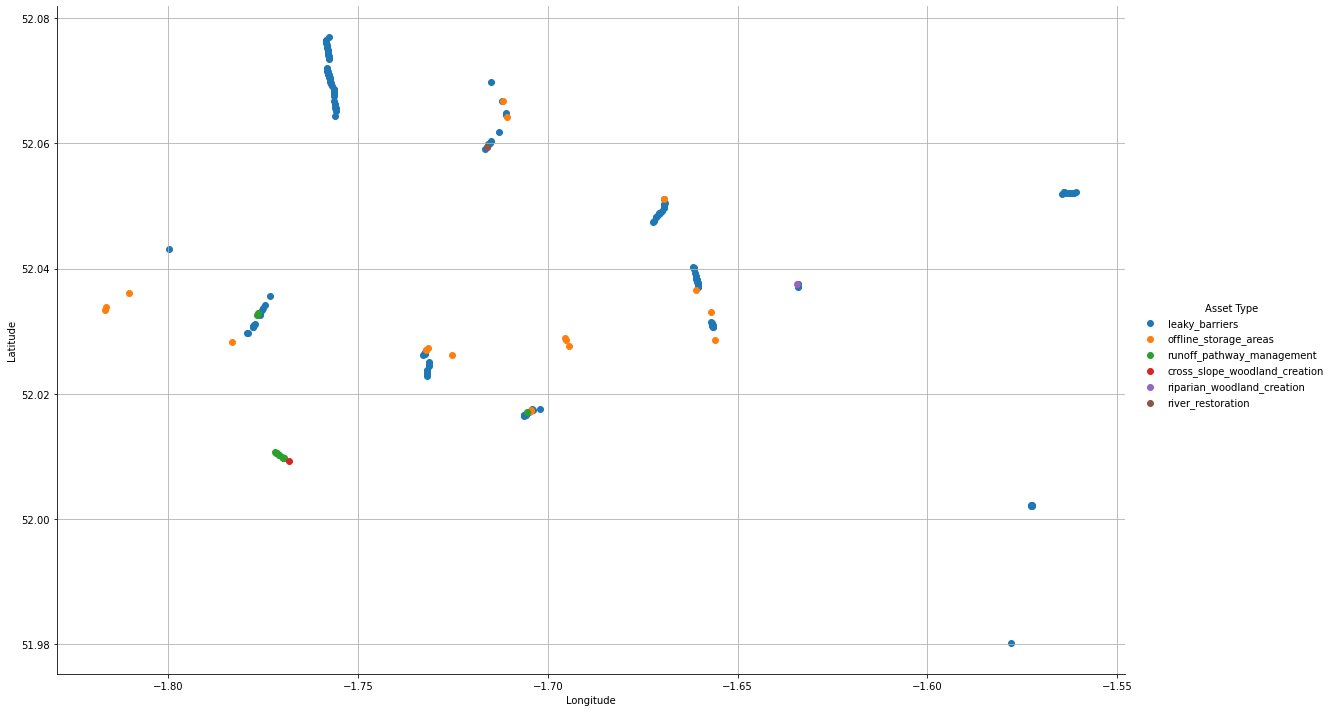

In [66]:
_assets = list(geo_df['Asset Type'].unique())
fg = sns.FacetGrid(data=geo_df, hue='Asset Type', hue_order=_assets, height=10, aspect=1.6)
fg.map(plt.scatter, 'Longitude', 'Latitude').add_legend()
plt.grid(True)

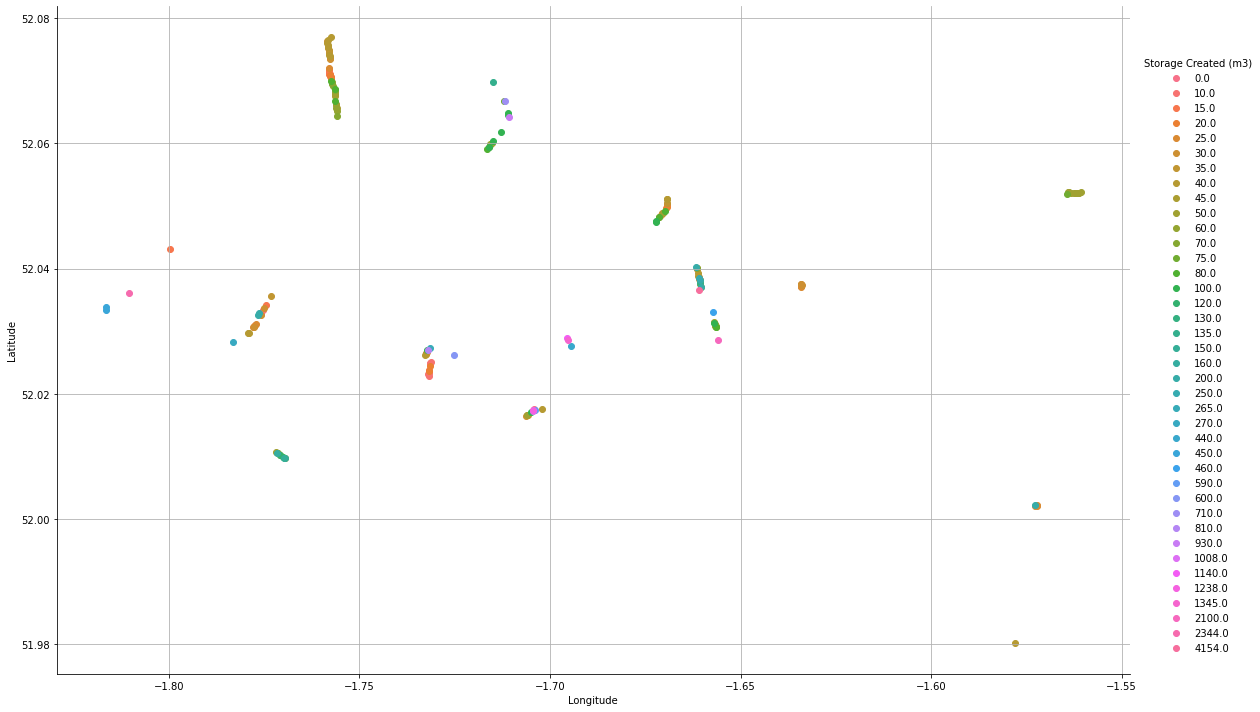

In [78]:
geo_storage = geo_df.dropna(subset=['Storage Created (m3)'])
_assets = sorted(list(geo_storage['Storage Created (m3)'].unique()))
fg = sns.FacetGrid(data=geo_storage, hue='Storage Created (m3)', hue_order=_assets, height=10, aspect=1.6)
fg.map(plt.scatter, 'Longitude', 'Latitude').add_legend()
plt.grid(True)

In [52]:
geo_df = geo_df.to_crs(epsg=3857)

AttributeError: ignored

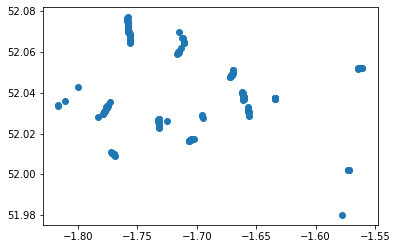

In [55]:
ax = plt.scatter(geo_df['Longitude'], geo_df['Latitude'])
ctx.add_basemap(ax)